In [1]:
import os

import matplotlib.pyplot as plt
from monai.data import ImageDataset
from monai.transforms import Resize, EnsureChannelFirst, Compose
from torch.utils.data import DataLoader

transformer = Compose([EnsureChannelFirst(),
                       Resize((160, 160))])

train_image_path = "data/REFUGE2/Train/Images/"
train_dm_path = "data/REFUGE2/Train/Disc_Masks/"
test_image_path = "data/REFUGE2/Test/Images/"
test_dm_path = "data/REFUGE2/Test/Disc_Masks/"
val_image_path = "data/REFUGE2/Validation/Images/"
val_dm_path = "data/REFUGE2/Validation/Disc_Masks/"

train_data = ImageDataset(image_files=[train_image_path + file for file in os.listdir(train_image_path)],
                          transform=transformer,
                          seg_files=[train_dm_path + file for file in os.listdir(train_dm_path)],
                          seg_transform=transformer)

train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)

C:\Users\Michael\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def plot_sample(sample):
    fig, (img1, img2) = plt.subplots(1, 2, layout="constrained")

    img1.imshow(sample[0].permute(1, 2, 0) / 255)
    img1.set_axis_off()
    img2.imshow(sample[1].permute(1, 2, 0) / 255, cmap="gray")
    img2.set_axis_off()
    plt.show()

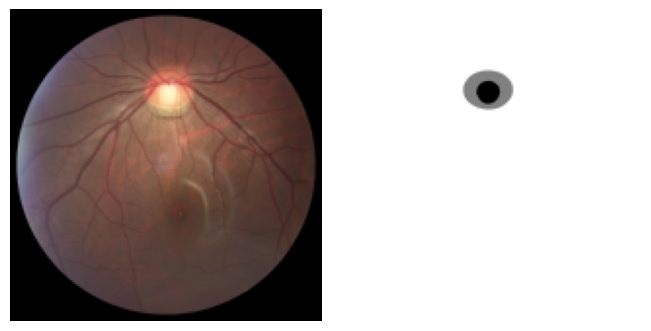

In [3]:
for batch in train_dataloader:
    plot_sample([batch[0][0], batch[1][0]])
    break